<a href="https://colab.research.google.com/github/Andoniadou-Lab/epitome_tools/blob/main/cell_typing_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this Colab Jupyter Notebook we demonstrate the epitome_tools cell typing workflow on two datasets (GSE239390, GSE120410) mentioned by reviewer 1 for our pending publication Kover et al. (2025).





### While these two datasets were included in the model training, the analysis here provides a careful control, namely that we repeat cell type annotation following different pre-processing. In GSE239390 the authors used Cell Ranger, while in GSE120410 a modified pituitary-specific reference genome was used. As such, when using these feature names, not all genes are present that our model "looks for". Despite this, we demonstrate accurate cell typing, showing robustness of our model.





### The notebook workflow consists of the following steps:

#### 1. We first download data from the respective GEO accessions: GSE239390, GSE120410

#### 2. We perform the required normalisation (which is standard in scRNA-seq), specifically: total count normalisation (to 10K) followed by log1p transformation.

#### 3. We show the one-line cell typing and doublet detection workflow with the epitome_tools model.

#### 4. We generate UMAPs of assigned cell types and dotplots of canonical markers to illustrate cell typing fidelity.



# Installing dependencies

In [1]:
!pip install scanpy
!pip install epitome_tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 127.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 27.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for epitome_tools: filename=epitome_tools-0.0.21-py3-none-any.whl size=36580399 sha256=9cea2ebc70165793414b6df20cf7136f95ba1496d87741472e3082bab781e411
  Stored in directory: /root/.cache/pip/wheels/38/37/e3/dae3dbc83f43370096637df8e74e883c79d76bb25bc995459e
Successfully built epitome_tools


# Downloading GSE239390

In [2]:
!wget --content-disposition "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE239390&format=file"

--2026-01-05 12:53:54--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE239390&format=file
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183777280 (175M) [application/x-tar]
Saving to: ‘GSE239390_RAW.tar’

GSE239390_RAW.tar   100%[===================>] 175.26M  72.4MB/s    in 2.4s    

2026-01-05 12:53:57 (72.4 MB/s) - ‘GSE239390_RAW.tar’ saved [183777280/183777280]



In [3]:
#un tar /content/GSE239390_RAW.tar
!tar -xf /content/GSE239390_RAW.tar

In [6]:
#gunzip, untar /content/GSM7664010_igacre_matrix.tar.gz
!gunzip /content/GSM7664010_igacre_matrix.tar.gz
!tar -xf /content/GSM7664010_igacre_matrix.tar

!gunzip /content/GSM7664008_Young_matrix.tar.gz
!tar -xf /content/GSM7664008_Young_matrix.tar

!gunzip /content/GSM7664009_Old_matrix.tar.gz
!tar -xf /content/GSM7664009_Old_matrix.tar

gzip: /content/GSM7664010_igacre_matrix.tar.gz: No such file or directory


# Annotating GSE239390

In [9]:
from epitome_tools.workflow import celltype_doublet_workflow, check_sample_compatibility_normalization
import scanpy as sc

Percentage of features present in adata: 97.32%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Combined matrix shape for model 1: (1339, 32288)
Found 1712 available features out of 1756 required for model 1.
Filled final matrix for model 1 from sparse data.
Percentage of features present in adata: 97.33%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Adding 'pct_counts_kept' to assay data.
[0.5461653  0.2201334  0.15439558 0.5360498  0.35629138]
Combined matrix shape for model 1: (1339, 32289)
Found 1462 available features out of 1498 required for model 2.
Filled final matrix for model 1 from sparse data.
Doublet prediction with model complete.
Percentage of features present in adata: 93.34%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Combined matrix shape for model 1: (9000, 31056)
Found 1642 ava

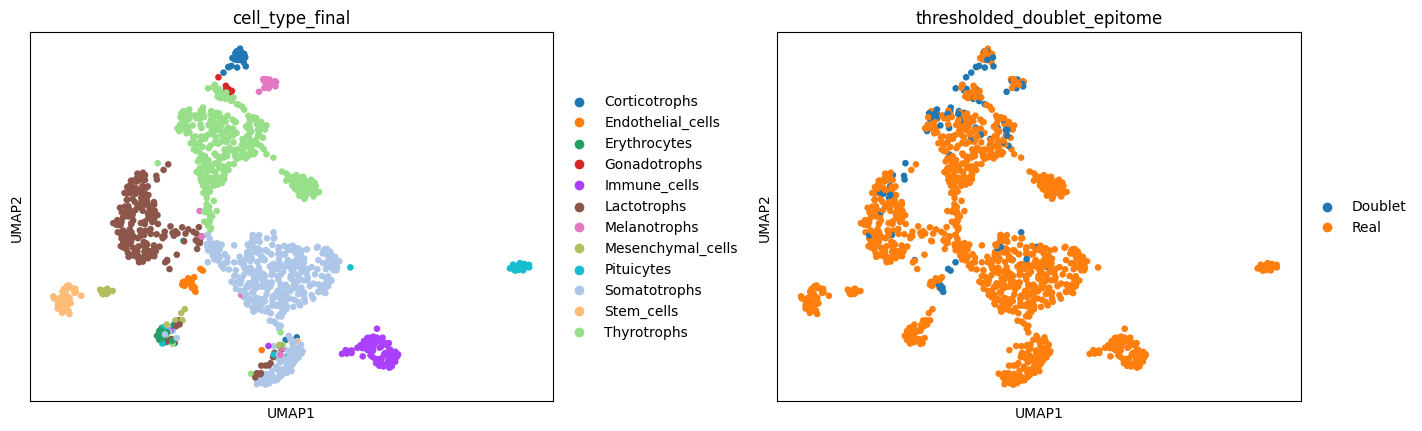

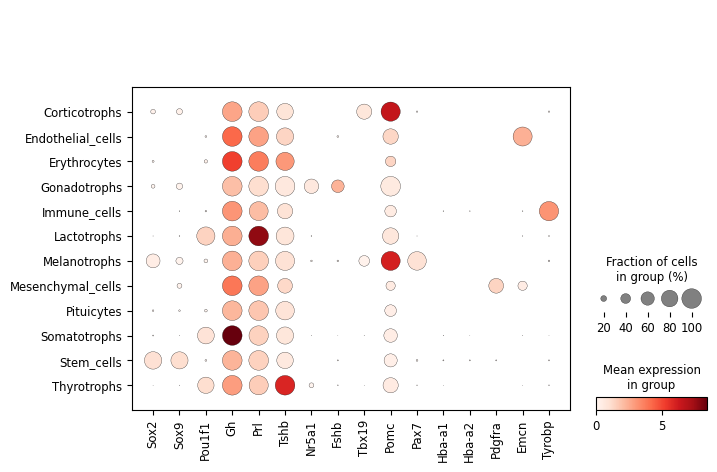

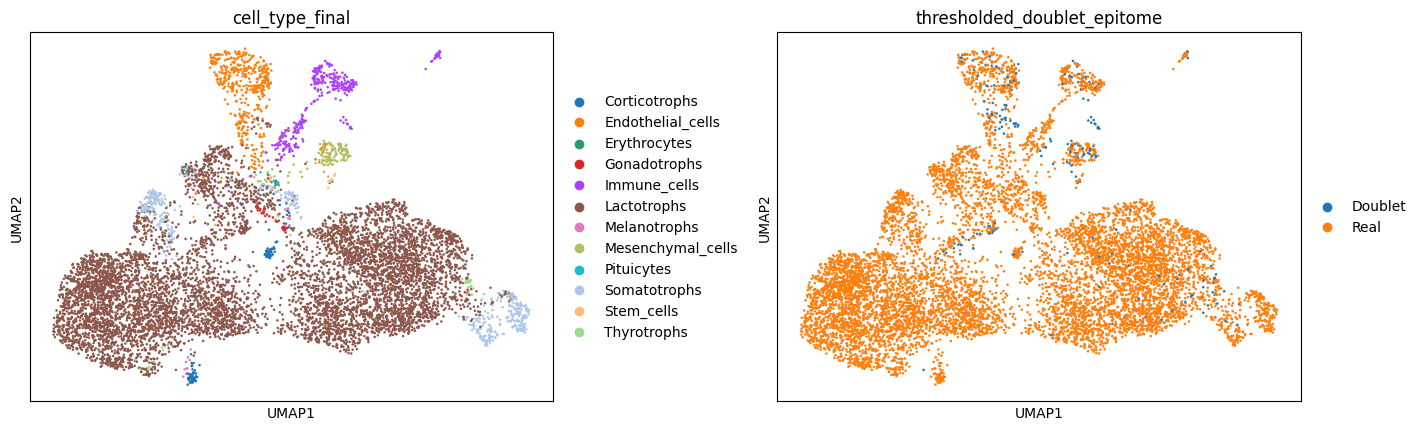

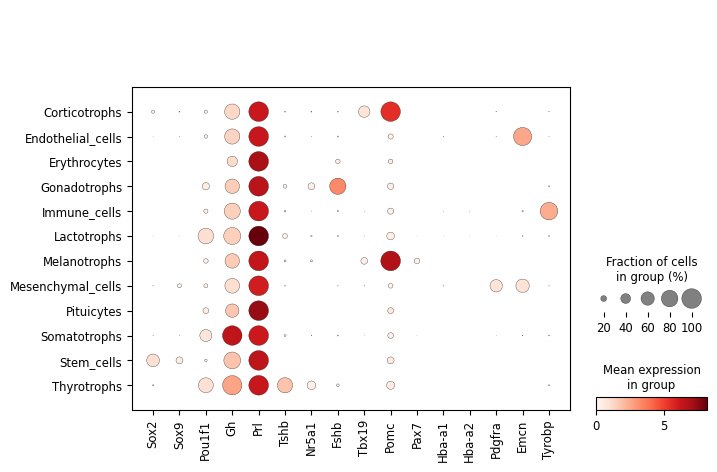

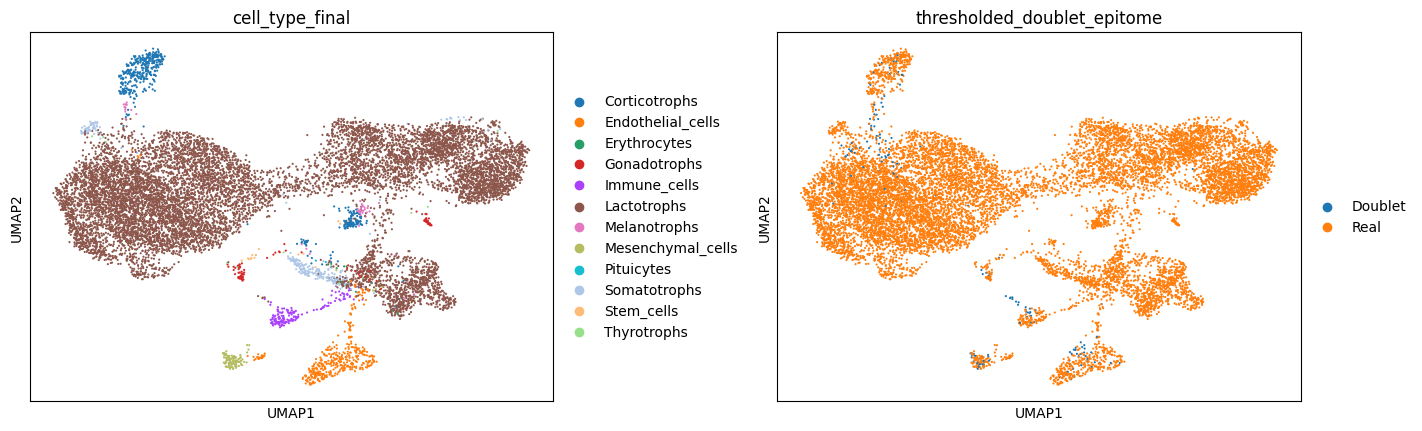

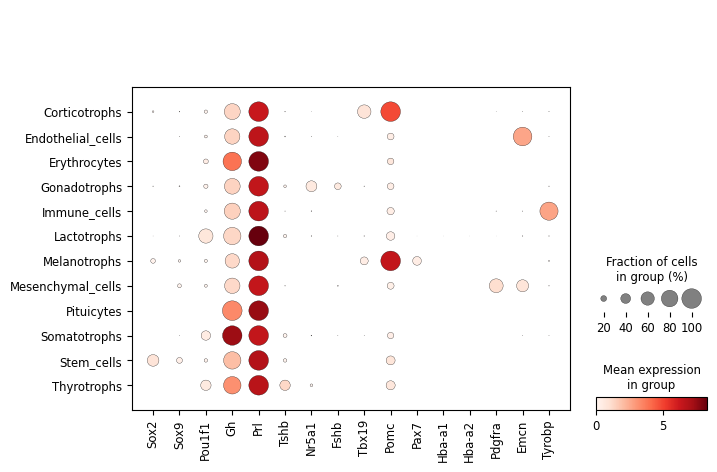

In [11]:
samples = ["igacre","PO12D","PY12C"]
for sample in samples:
  adata = sc.read_10x_mtx(f"/content/{sample}")
  sc.pp.normalize_total(adata, target_sum=1e4)
  sc.pp.log1p(adata)


  #pca, neighbors, umap
  sc.tl.pca(adata, svd_solver='arpack')
  sc.pp.neighbors(adata, n_neighbors=25, n_pcs=42)
  sc.tl.umap(adata)

  #cell typing
  adata = celltype_doublet_workflow(
                                adata,
                                active_assay="sc",
                                modality="rna",
                                nan_or_zero="zero")

  #plotting
  #thresholded_doublet_epitome True rename to Doublet and False to Real
  adata.obs["thresholded_doublet_epitome"] = adata.obs["thresholded_doublet_epitome"].replace({True: "Doublet", False: "Real"})
  #plotting
  umap = sc.pl.umap(adata, color=['cell_type_final','thresholded_doublet_epitome'],wspace=0.3, return_fig=True)
  #save as png and svg
  umap.savefig(f"/content/{sample}/umap.png", dpi=300)
  #dotplot of Sox2, Sox9, Pou1f1, Nr5a1, Tbx19, Pax7
  genes = ["Sox2","Sox9","Pou1f1","Gh","Prl","Tshb","Nr5a1","Fshb","Tbx19","Pomc","Pax7","Hba-a1","Hba-a2","Pdgfra","Emcn","Tyrobp"]
  dotplot = sc.pl.dotplot(adata, genes, groupby="cell_type_final", return_fig=True)
  dotplot.savefig(f"/content/{sample}/dotplot.png", dpi=300)

# Downloading GSE120410

In [12]:
#dl https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fbarcodes%2Etsv%2Egz
#dl https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fgenes%2Etsv%2Egz
#dl https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fmatrix%2Emtx%2Egz

!wget --content-disposition "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fbarcodes%2Etsv%2Egz"
!wget --content-disposition "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fgenes%2Etsv%2Egz"
!wget --content-disposition "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fmatrix%2Emtx%2Egz"
#make a new dir for these files called GSE120410

!mkdir /content/GSE120410
#copy there /content/GSE120410_barcodes.tsv.gz, /content/GSE120410_genes.tsv.gz and /content/GSE120410_matrix.mtx.gz
!mv /content/GSE120410_barcodes.tsv.gz /content/GSE120410/barcodes.tsv.gz
!mv /content/GSE120410_matrix.mtx.gz /content/GSE120410/matrix.mtx.gz
!mv /content/GSE120410_genes.tsv.gz /content/GSE120410/features.tsv.gz

--2026-01-05 13:12:42--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fbarcodes%2Etsv%2Egz
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55080 (54K) [application/octet-stream]
Saving to: ‘GSE120410_barcodes.tsv.gz’

GSE120410_barcodes. 100%[===================>]  53.79K  --.-KB/s    in 0.05s   

2026-01-05 13:12:42 (1.01 MB/s) - ‘GSE120410_barcodes.tsv.gz’ saved [55080/55080]

--2026-01-05 13:12:42--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fgenes%2Etsv%2Egz
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222709 (217K) 

# Annotating GSE120410

In [13]:
#reading /content/GSE120410/features.tsv.gz
import pandas as pd
data = pd.read_csv("/content/GSE120410/features.tsv.gz", sep="\t", header=None)
#add 3nd col saying "Gene Expression"
data[2] = "Gene Expression"
#save back
data.to_csv("/content/GSE120410/features.tsv.gz", sep="\t", header=None, index=False)


Percentage of features present in adata: 90.77%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Combined matrix shape for model 1: (13663, 28696)
Found 1597 available features out of 1756 required for model 1.
Filled final matrix for model 1 from sparse data.
Percentage of features present in adata: 94.19%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Adding 'pct_counts_kept' to assay data.
[0.16741687 0.38713175 0.20865618 0.502796   0.26538986]
Combined matrix shape for model 1: (13663, 28697)
Found 1415 available features out of 1498 required for model 2.
Filled final matrix for model 1 from sparse data.
Doublet prediction with model complete.


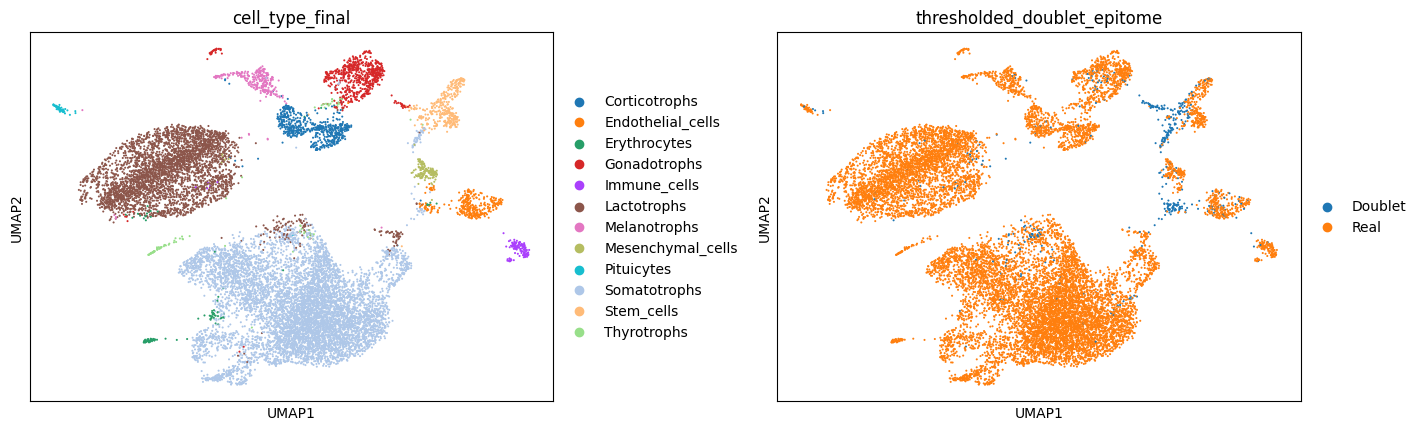

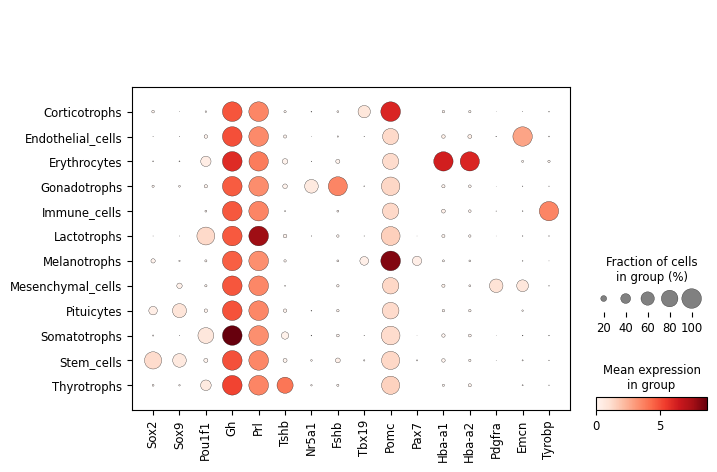

In [14]:
adata = sc.read_10x_mtx(f"/content/GSE120410/")
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

#pca, neighbors, umap
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=25, n_pcs=42)
sc.tl.umap(adata)

#cell typing
adata = celltype_doublet_workflow(
                              adata,
                              active_assay="sc",
                              modality="rna",
                              nan_or_zero="zero"
                          )

#thresholded_doublet_epitome True rename to Doublet and False to Real
adata.obs["thresholded_doublet_epitome"] = adata.obs["thresholded_doublet_epitome"].replace({True: "Doublet", False: "Real"})
#plotting
umap = sc.pl.umap(adata, color=['cell_type_final','thresholded_doublet_epitome'],wspace=0.3, return_fig=True)
#save as png and svg
umap.savefig("/content/GSE120410/umap.png", dpi=300)
#dotplot of Sox2, Sox9, Pou1f1, Nr5a1, Tbx19, Pax7
genes = ["Sox2","Sox9","Pou1f1","Gh","Prl","Tshb","Nr5a1","Fshb","Tbx19","Pomc","Pax7","Hba-a1","Hba-a2","Pdgfra","Emcn","Tyrobp"]
dotplot = sc.pl.dotplot(adata, genes, groupby="cell_type_final", return_fig=True)
dotplot.savefig("/content/GSE120410/dotplot.png", dpi=300)

### Based on the plots above, we conclude accurate, and useful cell type annotation, performed only in a couple seconds.

### For package/dependency versions, see below

In [15]:
!pip freeze

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.2
aiosignal==1.4.0
aiosqlite==0.22.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.2
altair==5.5.0
anndata==0.12.7
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.0
anywidget==0.9.21
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array-api-compat==1.13.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2025.12.15.0.40.51
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.30.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.12.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.4
catalogue==2.0.10
certifi==